# Исследование Яндекс.Афишы 

Цель: Исследование данных о продажах Яндек.Афиши, расчет метрик эффективности маркетинговых затрат,оптимизация маркетинговых затрат. Предоставлены данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

### 1. Загрузка данных

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
visits = pd.read_csv("C:/Users/kast1/Desktop/практикум/projects/visits_log (1).csv")

In [39]:
visits

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [40]:
orders = pd.read_csv("C:/Users/kast1/Desktop/практикум/projects/orders_log (1).csv")
orders

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [41]:
costs = pd.read_csv("C:/Users/kast1/Desktop/практикум/projects/costs (2).csv")
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


## Вывод

Библиотеки и данные загружены, в моем распоряжении 3 таблицы: с сессиями, с покупками в приложении и с затратами на маркетинг.

### 2. Предобработка данных

In [42]:
visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [43]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 9.6+ MB


In [44]:
visits.duplicated().sum()

0

In [45]:
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [46]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 984.7+ KB


In [47]:
orders.duplicated().sum()

0

In [48]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [49]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 49.7+ KB


In [50]:
costs.duplicated().sum()

0

**Необходимо привести даты во всех данных к типу to_datetime и переименовать столбцы.**

In [51]:
visits.columns = visits.columns.str.lower()

In [52]:
visits = visits.rename({'end ts':'end_ts','source id':'source_id', 'start ts':'start_ts'}, axis=1)

In [53]:
visits

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [54]:
orders.columns = orders.columns.str.lower()

In [55]:
orders = orders.rename({'buy ts':'buy_ts'}, axis=1)

In [56]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

In [57]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

## Вывод

Пропусков и дубликатов в данных нет, все типы данных соответсвуют своим значением.

### 3. Отчёты и метрики

### 3.1 DAU, MAU, WAU

Сначала рассчитаем **количество пользователей сервиса в день, неделю и месяц**.

Для начала выделим необходимые периоды и даты начала сессии клиента.

In [58]:
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date


In [59]:
visits['month'] = visits['session_date'].values.astype('datetime64[M]')

In [60]:
list = ['2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01']

In [61]:
for i in list:
    session_date = visits[visits['month'] == i]
    dau_total = session_date.groupby('session_date').agg({'uid': 'nunique'}).mean()
    print(i, 'В день:', int(dau_total))

2017-06-01 В день: 510
2017-07-01 В день: 532
2017-08-01 В день: 433
2017-09-01 В день: 739
2017-10-01 В день: 1133
2017-11-01 В день: 1328
2017-12-01 В день: 1240
2018-01-01 В день: 1096
2018-02-01 В день: 1217
2018-03-01 В день: 1052
2018-04-01 В день: 845
2018-05-01 В день: 786


In [62]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
print('В среднем в день за весь период:', int(dau_total))

В среднем в день за весь период: 907


In [65]:
dau_total = visits.groupby(['session_date']).agg({'uid':'nunique'})

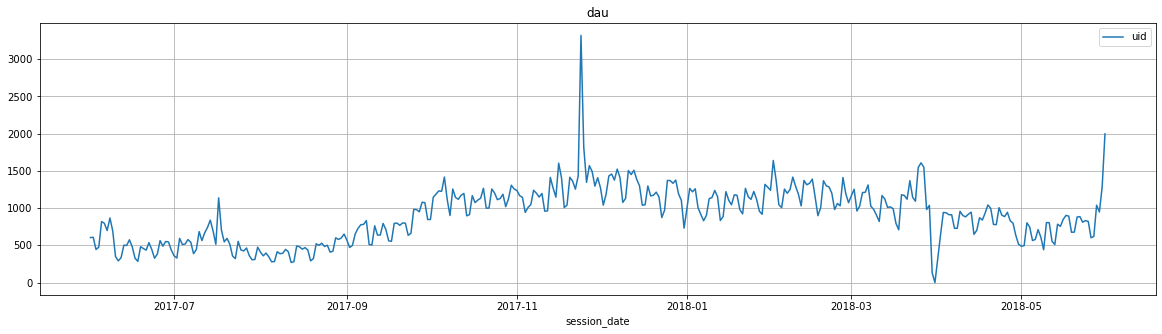

In [66]:
dau_total.plot(title = 'dau', figsize=(20,5),grid=True)
plt.show()


In [123]:
for i in list:
    session_date = visits[visits['month'] == i]
    wau_total = session_date.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
    print(i, 'В неделю:', int(wau_total))

2017-06-01 В неделю: 2855
2017-07-01 В неделю: 2549
2017-08-01 В неделю: 2509
2017-09-01 В неделю: 4118
2017-10-01 В неделю: 5431
2017-11-01 В неделю: 7256
2017-12-01 В неделю: 6977
2018-01-01 В неделю: 6258
2018-02-01 В неделю: 6291
2018-03-01 В неделю: 6018
2018-04-01 В неделю: 4527
2018-05-01 В неделю: 4509


In [136]:
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
print('В среднем в неделю за весь период:',int(wau_total))

В среднем в неделю за весь период: 5716


In [68]:
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'})

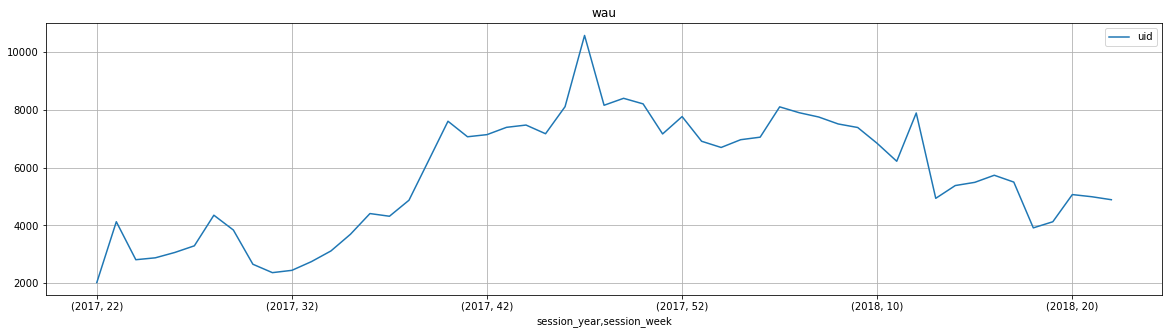

In [69]:
wau_total.plot(title = 'wau', figsize=(20,5),grid=True)
plt.show()

In [137]:
for i in list:
    session_date = visits[visits['month'] == i]
    mau_total = session_date.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
    print(i, 'В месяц:', int(mau_total))

2017-06-01 В месяц: 13259
2017-07-01 В месяц: 14183
2017-08-01 В месяц: 11631
2017-09-01 В месяц: 18975
2017-10-01 В месяц: 29692
2017-11-01 В месяц: 32797
2017-12-01 В месяц: 31557
2018-01-01 В месяц: 28716
2018-02-01 В месяц: 28749
2018-03-01 В месяц: 27473
2018-04-01 В месяц: 21008
2018-05-01 В месяц: 20701


In [138]:
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
print('В среднем в месяц за весь период:',int(mau_total))

В среднем в месяц за весь период: 23228


In [70]:
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'})

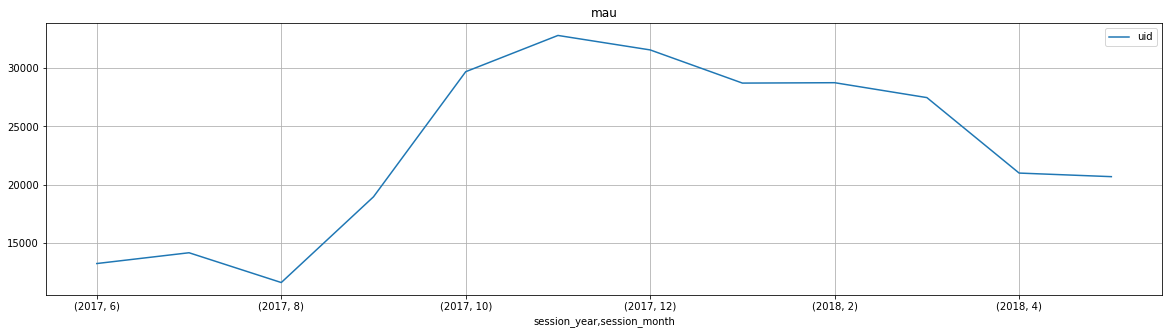

In [71]:
mau_total.plot(title = 'mau', figsize=(20,5),grid=True)
plt.show()

**Вывод**

Итого ежедневно на сайт в среднем заходит **907** уникальных пользователей, в неделю их в среднем **5716**, а в месяц - **23.228 человек**.

В зимний период количество поситителей растет по сравнению с летним. Вероятно, это связано с тем, что летом люди хотят больше времени проводить на улице, а как только холодает, предпочитают ходить на концерты, в театр и т.д.

## 3.2 Рассчитаем **количество сессий в день**

,uid
count,364.000000
mean,987.362637
std,418.994796
min,1.000000
25%,635.500000
50%,1003.000000
75%,1280.000000
max,4042.000000


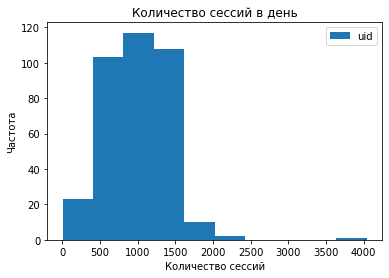

In [72]:
session_per_day = visits.groupby('session_date').agg({'uid':'count'})

ax = session_per_day.plot(kind='hist', title='Количество сессий в день')
ax.set_xlabel('Количество сессий')
ax.set_ylabel('Частота')
session_per_day.describe()

count    228169.000000
mean          1.575148
std           4.646800
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         893.000000
Name: start_ts, dtype: float64

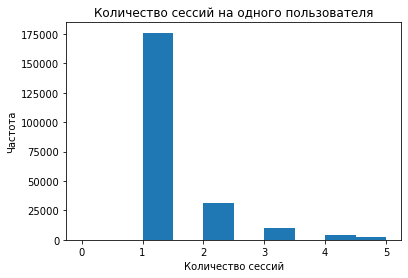

In [73]:
session_per_user = visits.groupby('uid')['start_ts'].count()
ax = session_per_user.plot(kind='hist', title='Количество сессий на одного пользователя', range=(0,5))
ax.set_xlabel('Количество сессий')
ax.set_ylabel('Частота')
session_per_user.describe()

**Вывод**

Большинство пользователей заходят на сайт не чаще 1 раза в день

## 3.3 **Длительность одной сессии**

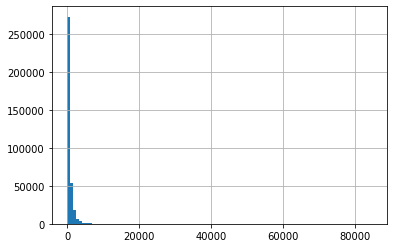

In [31]:
visits['session_duration_sec'].hist(bins=100) ;

Распределение величины не является нормальным, поэтому ориентироваться на показатель среднего арифмтического будет не корректно. Поэтому рассчитаем моду величины.

In [29]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [135]:
(visits['session_duration_sec'].mode()) / 60

0    1.0
dtype: float64

**Вывод**

Больше всего пользователей завершают сеанс в течение 1 минуты (судя по значению моды), 

# 4. **Расчет Retention Rate**

In [32]:
first_activity_date = visits.groupby('uid')['start_ts'].min()
first_activity_date.name = 'first_activity_date'
first_activity_date

uid
11863502262781         2018-03-01 17:27:00
49537067089222         2018-02-06 15:55:00
297729379853735        2017-06-07 18:47:00
313578113262317        2017-09-18 22:49:00
325320750514679        2017-09-30 14:29:00
                               ...        
18446403737806311543   2017-11-30 03:36:00
18446424184725333426   2017-12-06 20:32:00
18446556406699109058   2018-01-01 16:29:00
18446621818809592527   2017-12-27 13:27:00
18446676030785672386   2017-10-04 16:01:00
Name: first_activity_date, Length: 228169, dtype: datetime64[ns]

In [33]:
visits = visits.join(first_activity_date, on='uid') 

In [34]:
visits

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00
...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,19,2017-07-29 19:07:00
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,19,2018-01-25 17:38:00
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,19,2018-03-03 10:12:00
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,19,2017-11-02 10:12:00


In [35]:
visits['first_order_month'] = visits['first_activity_date'].astype('datetime64[M]')
visits['order_month'] = visits['start_ts'].astype('datetime64[M]')
visits

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity_date,first_order_month,order_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,19,2017-07-29 19:07:00,2017-07-01,2017-07-01
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,19,2018-01-25 17:38:00,2018-01-01,2018-01-01
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,19,2018-03-03 10:12:00,2018-03-01,2018-03-01
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,19,2017-11-02 10:12:00,2017-11-01,2017-11-01


In [36]:
visits['cohort_lifetime'] = visits['order_month'] - visits['first_order_month']
visits

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity_date,first_order_month,order_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0 days
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0 days
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0 days
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01,61 days
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,19,2017-07-29 19:07:00,2017-07-01,2017-07-01,0 days
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,19,2018-01-25 17:38:00,2018-01-01,2018-01-01,0 days
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,19,2018-03-03 10:12:00,2018-03-01,2018-03-01,0 days
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,19,2017-11-02 10:12:00,2017-11-01,2017-11-01,0 days


In [37]:
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int') 
visits

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity_date,first_order_month,order_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,19,2017-07-29 19:07:00,2017-07-01,2017-07-01,0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,19,2018-01-25 17:38:00,2018-01-01,2018-01-01,0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,19,2018-03-03 10:12:00,2018-03-01,2018-03-01,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,19,2017-11-02 10:12:00,2017-11-01,2017-11-01,0


In [38]:
cohorts = visits.groupby(['first_order_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 
cohorts

,first_order_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


In [39]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_order_month','uid']]
initial_users_count

,first_order_month,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [40]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
initial_users_count

,first_order_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [41]:
cohorts = cohorts.merge(initial_users_count,on='first_order_month') 
cohorts

,first_order_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


In [42]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users'] 

In [43]:
cohorts

,first_order_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557
...,...,...,...,...,...
73,2018-03-01,1,861,20589,0.041818
74,2018-03-01,2,557,20589,0.027053
75,2018-04-01,0,15709,15709,1.000000
76,2018-04-01,1,760,15709,0.048380


In [150]:
retention_pivot = cohorts.pivot_table(index='first_order_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


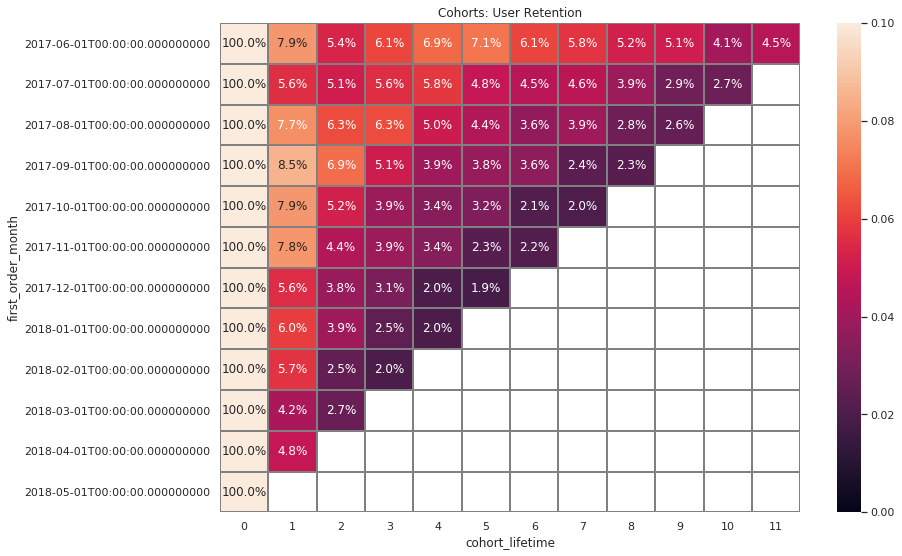

In [151]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0, vmax=0.1); 

# Вывод

Retention Rate достаточно низкий, больше 90-95% пользователей не возвращаются в следующих месяцах.

Retention Rate за 11 месяцев опустился на 3.1%, При этом в сентябре, ноябре были самые высокие показатели: 8.8% и 7.9%

Лучшие показатели у пользователей первой когорты, даже при падении RR почти вдвое, их конечный уровень в два раза выше остальных когорт.

## 5. Продажи

### 5.1. Начало продаж

Посмотрим, сколько времени проходит между первым визитом пользователя на сайт и первым заказом.

In [46]:
orders

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [47]:
visits_gr = visits.groupby(['uid','start_ts']).agg({'start_ts': 'min'})
visits_gr.rename(columns={'uid':'uid', 'start_ts':'start_ts', 'start_ts':'session_date'}, inplace=True)
visits_gr

session_date
uid                  start_ts                               
11863502262781       2018-03-01 17:27:00 2018-03-01 17:27:00
49537067089222       2018-02-06 15:55:00 2018-02-06 15:55:00
297729379853735      2017-06-07 18:47:00 2017-06-07 18:47:00
313578113262317      2017-09-18 22:49:00 2017-09-18 22:49:00
                     2018-02-18 15:17:00 2018-02-18 15:17:00
...                                                      ...
18446424184725333426 2017-12-06 20:32:00 2017-12-06 20:32:00
18446556406699109058 2018-01-01 16:29:00 2018-01-01 16:29:00
18446621818809592527 2017-12-27 13:27:00 2017-12-27 13:27:00
                     2018-05-21 09:30:00 2018-05-21 09:30:00
18446676030785672386 2017-10-04 16:01:00 2017-10-04 16:01:00

[359399 rows x 1 columns]

In [48]:
first_purchase_date = orders.groupby('uid')['buy_ts'].min()
first_purchase_date.name = 'first_purchase_date'
first_purchase_date

uid
313578113262317        2018-01-03 21:51:00
1575281904278712       2017-06-03 10:13:00
2429014661409475       2017-10-11 18:33:00
2464366381792757       2018-01-28 15:54:00
2551852515556206       2017-11-24 10:14:00
                               ...        
18445147675727495770   2017-11-24 09:03:00
18445407535914413204   2017-09-22 23:55:00
18445601152732270159   2018-03-26 22:54:00
18446156210226471712   2018-02-18 19:34:00
18446167067214817906   2017-10-17 10:16:00
Name: first_purchase_date, Length: 36523, dtype: datetime64[ns]

In [49]:
visits_gr = visits_gr.merge(first_purchase_date, on='uid')
visits_gr

,session_date,first_purchase_date
uid,,
313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
313578113262317,2018-02-18 15:17:00,2018-01-03 21:51:00
313578113262317,2018-03-11 17:23:00,2018-01-03 21:51:00
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
1575281904278712,2017-06-03 17:36:00,2017-06-03 10:13:00
...,...,...
18446156210226471712,2018-02-19 10:17:00,2018-02-18 19:34:00
18446156210226471712,2018-02-20 12:47:00,2018-02-18 19:34:00
18446156210226471712,2018-02-24 09:36:00,2018-02-18 19:34:00


In [50]:
def session_count(row):
    purchase_date = row['first_purchase_date']
    visit_date = row['session_date']
    if purchase_date > visit_date:
        return 1
    if purchase_date < visit_date:
        return 0
visits_gr['session_before_purchase'] = visits_gr.apply(session_count, axis=1)

In [51]:
visits_gr

,session_date,first_purchase_date,session_before_purchase
uid,,,
313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,1.0
313578113262317,2018-02-18 15:17:00,2018-01-03 21:51:00,0.0
313578113262317,2018-03-11 17:23:00,2018-01-03 21:51:00,0.0
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,NaN
1575281904278712,2017-06-03 17:36:00,2017-06-03 10:13:00,0.0
...,...,...,...
18446156210226471712,2018-02-19 10:17:00,2018-02-18 19:34:00,0.0
18446156210226471712,2018-02-20 12:47:00,2018-02-18 19:34:00,0.0
18446156210226471712,2018-02-24 09:36:00,2018-02-18 19:34:00,0.0


In [52]:
sessions_before_purchase = visits_gr.groupby('uid')['session_before_purchase'].sum()
sessions_before_purchase.mean() 

1.448402376584618

*В среднем покупателям необходимо 1.5 сессии до покупки*

In [181]:
start = visits_gr['session_date']
end = visits_gr['first_purchase_date']
days_before_purchase = (start- end).dt.days

d = days_before_purchase.reset_index()
d.columns = ['uid', 'deltadays']
d

,uid,deltadays
0,313578113262317,-107
1,313578113262317,45
2,313578113262317,66
3,1575281904278712,0
4,1575281904278712,0
...,...,...
97389,18446156210226471712,0
97390,18446156210226471712,1
97391,18446156210226471712,5
97392,18446167067214817906,-1


Необходимо учитывать только 0 и отрицательные значения, т.к. положительные это дни после первой покупки, что не соответствует условиям задачи.

In [186]:
d = d.query('deltadays <= 0')

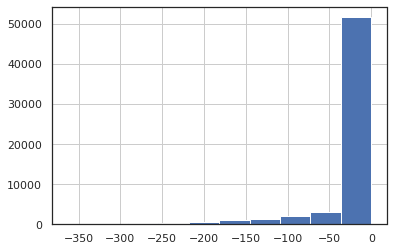

In [188]:
d['deltadays'].hist()

In [169]:
seconds_before_purchase.mode()

0   -1
dtype: int64

**Вывод**

*В среднем покупателям необходим 1 день до первой покупки*

### **5.2. Количество покупок за период**

In [53]:
orders

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [54]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01


In [55]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [56]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes 

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [57]:
orders_new = pd.merge(orders,first_orders, on='uid')
orders_new

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01


In [58]:
cohorts_for_purchases = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'count'}).reset_index()
cohorts_for_purchases

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292
...,...,...,...
74,2018-03-01,2018-05-01,176
75,2018-04-01,2018-04-01,2495
76,2018-04-01,2018-05-01,195
77,2018-05-01,2018-05-01,3249


In [59]:
report = pd.merge(cohort_sizes, cohorts_for_purchases, on='first_order_month')
report['purchase_per_month'] = report['revenue'] / report['n_buyers']
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report

,first_order_month,n_buyers,order_month,revenue,purchase_per_month,age
0,2017-06-01,2023,2017-06-01,2354,1.163618,0
1,2017-06-01,2023,2017-07-01,177,0.087494,1
2,2017-06-01,2023,2017-08-01,174,0.086011,2
3,2017-06-01,2023,2017-09-01,226,0.111715,3
4,2017-06-01,2023,2017-10-01,292,0.144340,4
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,176,0.049816,2
75,2018-04-01,2276,2018-04-01,2495,1.096221,0
76,2018-04-01,2276,2018-05-01,195,0.085677,1
77,2018-05-01,2988,2018-05-01,3249,1.087349,0


In [60]:
output_purchase_amount = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='purchase_per_month', 
        aggfunc='mean')
    
output_purchase_amount.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.163618,0.0874938,0.0860109,0.111715,0.14434,0.107761,0.136431,0.0860109,0.104795,0.0756303,0.0474543,0.0425111
2017-07-01,1.136765,0.0520021,0.0624025,0.0540822,0.0374415,0.0426417,0.0317213,0.026001,0.0301612,0.0124805,0.0275611,
2017-08-01,1.118978,0.0788321,0.0729927,0.0591241,0.0620438,0.0452555,0.0357664,0.0569343,0.0335766,0.0335766,,
2017-09-01,1.136381,0.0848508,0.0623789,0.0635413,0.0259589,0.0422317,0.0418442,0.021697,0.0236343,,,
2017-10-01,1.143779,0.0723502,0.0373272,0.0281106,0.0297235,0.0237327,0.0198157,0.0288018,,,,
2017-11-01,1.179368,0.0972801,0.0445969,0.051703,0.0333252,0.0144572,0.0249939,,,,,
2017-12-01,1.152635,0.0616016,0.0460872,0.0408396,0.0196213,0.0239562,,,,,,
2018-01-01,1.121554,0.0664097,0.047139,0.0189742,0.0231248,,,,,,,
2018-02-01,1.121611,0.0608053,0.0227335,0.0191728,,,,,,,,


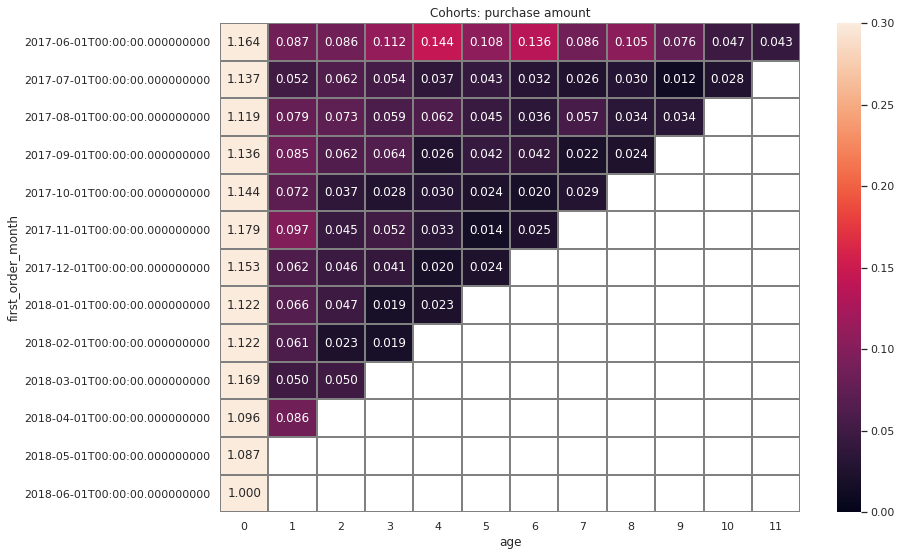

In [189]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: purchase amount')
sns.heatmap(output_purchase_amount, annot=True, fmt='.3f', linewidths=1, linecolor='gray', vmin=0, vmax=0.3); 

## 5.3. Средний чек

In [62]:
orders['revenue'].mean()

4.999646930477041

Рассчитаем средний чек по когортам

In [63]:
orders_grouped_by_cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'nunique'})
orders_grouped_by_cohorts

revenue   uid
first_order_month order_month                
2017-06-01        2017-06-01    9557.49  2023
                  2017-07-01     981.82    61
                  2017-08-01     885.34    50
                  2017-09-01    1931.30    54
                  2017-10-01    2068.58    88
...                                 ...   ...
2018-03-01        2018-05-01    1114.87    58
2018-04-01        2018-04-01   10600.69  2276
                  2018-05-01    1209.92    69
2018-05-01        2018-05-01   13925.76  2988
2018-06-01        2018-06-01       3.42     1

[79 rows x 2 columns]

In [64]:
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid'] 

In [65]:
average_check = orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='order_month',values='revenue_per_user',aggfunc='mean') 

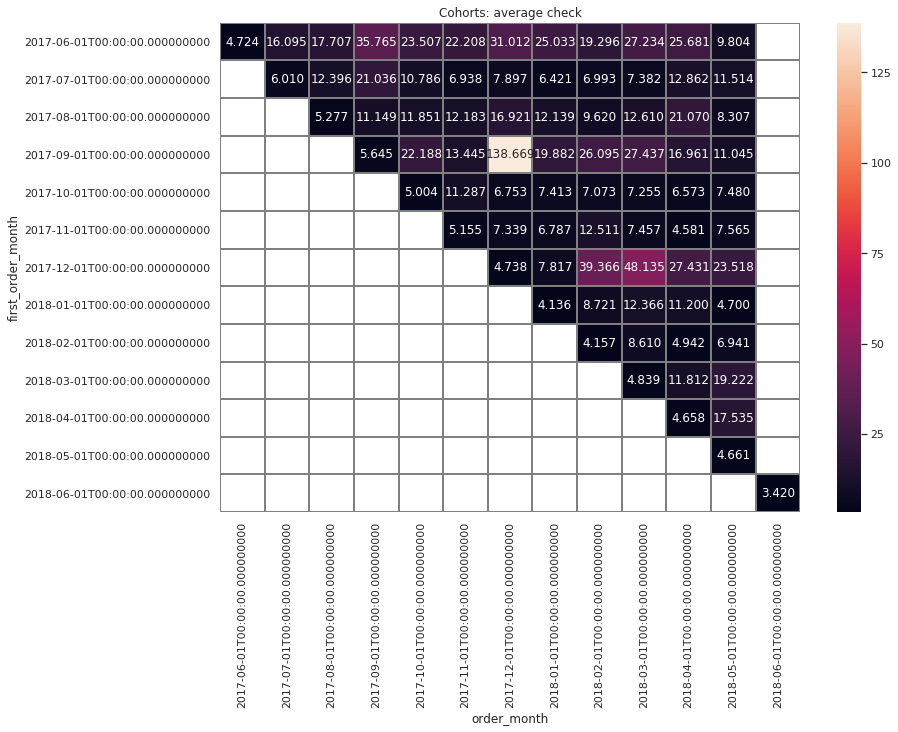

In [66]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: average check')
sns.heatmap(average_check, annot=True, fmt='.3f', linewidths=1, linecolor='gray'); 

Когорты в июне и декабре показывали самые высокие и наиболее стабильные результаты В сеньтябрьской когорте было пиковое значение в декабре в 138 у.е. Практически все когорты показали рост относительно первого месяца.

## 5.4. Расчет LTV

In [67]:
cohorts_ltv = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

In [68]:
report_ltv = pd.merge(cohort_sizes, cohorts_ltv, on='first_order_month')
report_ltv

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92
77,2018-05-01,2988,2018-05-01,13925.76


In [69]:
margin_rate = 1
    
report_ltv['gp'] = report_ltv['revenue'] * margin_rate


In [70]:
report_ltv['age'] = (report_ltv['order_month'] - report_ltv['first_order_month']) / np.timedelta64(1, 'M')
report_ltv['age'] = report_ltv['age'].round().astype('int')
report_ltv

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,1114.87,2
75,2018-04-01,2276,2018-04-01,10600.69,10600.69,0
76,2018-04-01,2276,2018-05-01,1209.92,1209.92,1
77,2018-05-01,2988,2018-05-01,13925.76,13925.76,0


In [71]:
report_ltv['ltv'] = report_ltv['gp'] / report_ltv['n_buyers']
    
output_ltv = report_ltv.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)
    
output_ltv.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


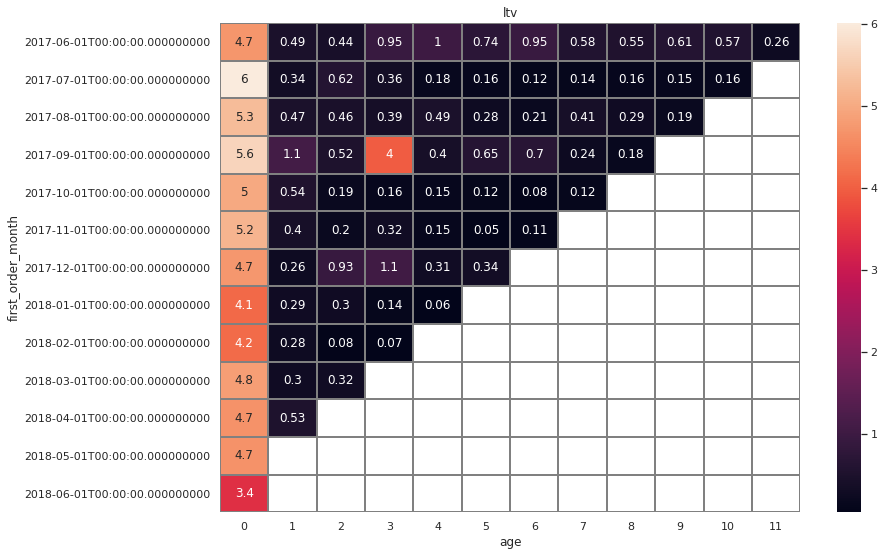

In [72]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ltv')
sns.heatmap(output_ltv, annot=True, linewidths=1, linecolor='gray'); 

In [73]:
output_ltv.cumsum(axis=1).mean(axis=1) 

first_order_month
2017-06-01     8.529167
2017-07-01     7.480909
2017-08-01     7.062000
2017-09-01    10.511111
2017-10-01     5.870000
2017-11-01     5.912857
2017-12-01     6.271667
2018-01-01     4.620000
2018-02-01     4.427500
2018-03-01     5.146667
2018-04-01     4.925000
2018-05-01     4.660000
2018-06-01     3.420000
dtype: float64

## Вывод

В среднем покупателям необходимо 1.5 сессии до покупки. Когорты в июне и декабре показывали самые высокие и наиболее стабильные результаты В сеньтябрьской когорте было пиковое значение в декабре в 138 у.е. Практически все когорты показали рост относительно первого месяца. В среднем каждый покупатель из первой когорты принес по 8 у.е. выручки за 11 месяцев «жизни». В сентябрьской когорте была максимальная прибыль в 10 у.е. Потом показатель ltv падал и самый низкий был в последней когорте 3.4 у.е.

## 6. Маркетинг


### 6.1 Сколько денег потратили? Всего / на каждый источник / по времени


In [74]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [75]:
costs['costs'].sum()

329131.62

Всего потратили на маркетинг 329131 у.е.

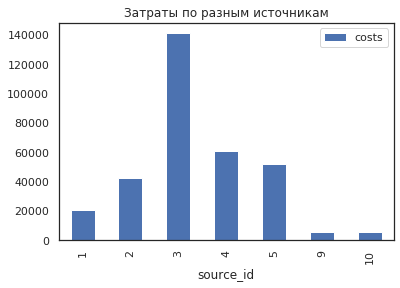

In [76]:
costs_per_source = costs.groupby('source_id')['costs'].sum().reset_index()
costs_per_source.sort_values(by='costs', ascending=False)
costs_per_source.plot(x='source_id', kind='bar', title='Затраты по разным источникам')

Больше всего потратили на маркетинговый канал №3, меньше всего на 9 и 10.

In [77]:
costs['month'] = costs['dt'].astype('datetime64[M]') 

In [78]:
monthly_costs = costs.groupby('month')['costs'].sum().reset_index()
monthly_costs

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


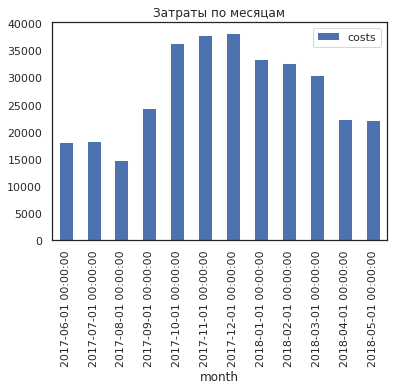

In [79]:
monthly_costs = costs.groupby('month').sum().reset_index()
monthly_costs.plot(x='month', y='costs', kind='bar', title='Затраты по месяцам');

Самые низкие затраты на маркетинг были в августе, потом они начали расти и к декабрю были самые высокие значения. С января затраты на маркетинг уменьшались.

### 6.2. Окупаемость по когортам

In [80]:
report_new = pd.merge(report_ltv, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,month,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,2017-06-01,1020,18015.00,8.905091
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,2017-06-01,1020,18015.00,8.905091
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,2017-06-01,1020,18015.00,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,2017-06-01,1020,18015.00,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,2017-06-01,1020,18015.00,8.905091
...,...,...,...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1063.05,1,0.300892,2018-03-01,1025,30415.27,8.608907
74,2018-03-01,3533,2018-05-01,1114.87,1114.87,2,0.315559,2018-03-01,1025,30415.27,8.608907
75,2018-04-01,2276,2018-04-01,10600.69,10600.69,0,4.657597,2018-04-01,986,22289.38,9.793225
76,2018-04-01,2276,2018-05-01,1209.92,1209.92,1,0.531599,2018-04-01,986,22289.38,9.793225


In [81]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output_romi = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output_romi.cumsum(axis=1).round(2).fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.49,0.5,0.51,,,,,,,,


In [82]:
output_romi.cumsum(axis=1).mean(axis=0) 

age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

Когорты начали окупаться к 9 месяцу.

### 6.3. Сколько стоило привлечение одного покупателя из каждого источника

In [83]:
#проверка
orders['revenue'].sum()

252057.19999999998

In [84]:
vis = visits.groupby('uid')['source_id'].min().reset_index()
vis

,uid,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5
...,...,...
228164,18446403737806311543,5
228165,18446424184725333426,4
228166,18446556406699109058,3
228167,18446621818809592527,4


In [85]:
len(vis['uid'].unique())

228169

In [86]:
orders

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01


In [87]:
orders_source = orders.merge(vis, on='uid')
orders_source

,buy_ts,revenue,uid,order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,3


In [88]:
len(orders_source['uid'].unique())

36523

In [89]:
# проверка
orders_source['revenue'].sum()

252057.2

In [90]:
first_order_mon = orders_source.groupby(['uid', 'source_id'])['order_month'].min().reset_index()

first_order_mon.columns = ['uid', 'source_id', 'first_order_month']
first_order_mon

,uid,source_id,first_order_month
0,313578113262317,2,2018-01-01
1,1575281904278712,10,2017-06-01
2,2429014661409475,3,2017-10-01
3,2464366381792757,5,2018-01-01
4,2551852515556206,5,2017-11-01
...,...,...,...
36518,18445147675727495770,5,2017-11-01
36519,18445407535914413204,2,2017-09-01
36520,18445601152732270159,2,2018-03-01
36521,18446156210226471712,1,2018-02-01


In [91]:
cohort_sizes_sour = first_order_mon.groupby(['first_order_month','source_id']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes_sour.columns = ['first_order_month','source_id', 'n_buyers']
cohort_sizes_sour 

,first_order_month,source_id,n_buyers
0,2017-06-01,1,401
1,2017-06-01,2,334
2,2017-06-01,3,610
3,2017-06-01,4,314
4,2017-06-01,5,265
...,...,...,...
81,2018-05-01,4,678
82,2018-05-01,5,404
83,2018-05-01,9,36
84,2018-05-01,10,90


In [92]:
orders_new_coh = pd.merge(orders_source,first_order_mon, on='uid')
orders_new_coh

,buy_ts,revenue,uid,order_month,source_id_x,source_id_y,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1,1,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2,2,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2,2,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2,2,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3,3,2017-06-01
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,4,4,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,10,10,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,3,3,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,3,3,2018-05-01


In [93]:
cohorts_source = orders_new_coh.groupby(['first_order_month','order_month', 'source_id_x']).agg({'revenue': 'sum'}).reset_index()
cohorts_source.columns = ['first_order_month', 'order_month', 'source_id', 'revenue']
cohorts_source

,first_order_month,order_month,source_id,revenue
0,2017-06-01,2017-06-01,1,2563.84
1,2017-06-01,2017-06-01,2,1965.04
2,2017-06-01,2017-06-01,3,2101.48
3,2017-06-01,2017-06-01,4,1411.06
4,2017-06-01,2017-06-01,5,1296.31
...,...,...,...,...
446,2018-05-01,2018-05-01,4,2691.50
447,2018-05-01,2018-05-01,5,1655.59
448,2018-05-01,2018-05-01,9,95.44
449,2018-05-01,2018-05-01,10,318.57


In [94]:
report_source = pd.merge(cohort_sizes_sour, cohorts_source, on=['first_order_month', 'source_id'])
report_source

,first_order_month,source_id,n_buyers,order_month,revenue
0,2017-06-01,1,401,2017-06-01,2563.84
1,2017-06-01,1,401,2017-07-01,881.60
2,2017-06-01,1,401,2017-08-01,755.03
3,2017-06-01,1,401,2017-09-01,1783.91
4,2017-06-01,1,401,2017-10-01,1884.06
...,...,...,...,...,...
446,2018-05-01,4,678,2018-05-01,2691.50
447,2018-05-01,5,404,2018-05-01,1655.59
448,2018-05-01,9,36,2018-05-01,95.44
449,2018-05-01,10,90,2018-05-01,318.57


In [95]:
#проверка
report_source['revenue'].sum()

252057.2

In [96]:
report_source['gp'] = report_source['revenue'] * margin_rate

In [97]:
report_source['ltv'] = report_source['gp'] / report_source['n_buyers']

In [98]:
report_source

,first_order_month,source_id,n_buyers,order_month,revenue,gp,ltv
0,2017-06-01,1,401,2017-06-01,2563.84,2563.84,6.393616
1,2017-06-01,1,401,2017-07-01,881.60,881.60,2.198504
2,2017-06-01,1,401,2017-08-01,755.03,755.03,1.882868
3,2017-06-01,1,401,2017-09-01,1783.91,1783.91,4.448653
4,2017-06-01,1,401,2017-10-01,1884.06,1884.06,4.698404
...,...,...,...,...,...,...,...
446,2018-05-01,4,678,2018-05-01,2691.50,2691.50,3.969764
447,2018-05-01,5,404,2018-05-01,1655.59,1655.59,4.097995
448,2018-05-01,9,36,2018-05-01,95.44,95.44,2.651111
449,2018-05-01,10,90,2018-05-01,318.57,318.57,3.539667


In [99]:
c = costs.groupby(['month','source_id'])['costs'].sum().reset_index()
c.columns = ['order_month', 'source_id', 'costs']
c

,order_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


In [100]:
total = pd.merge(report_source, c, on=['order_month', 'source_id'])
total

,first_order_month,source_id,n_buyers,order_month,revenue,gp,ltv,costs
0,2017-06-01,1,401,2017-06-01,2563.84,2563.84,6.393616,1125.61
1,2017-06-01,1,401,2017-07-01,881.60,881.60,2.198504,1072.88
2,2017-07-01,1,400,2017-07-01,3065.65,3065.65,7.664125,1072.88
3,2017-06-01,1,401,2017-08-01,755.03,755.03,1.882868,951.81
4,2017-07-01,1,400,2017-08-01,487.94,487.94,1.219850,951.81
...,...,...,...,...,...,...,...,...
444,2017-11-01,10,74,2018-05-01,3.66,3.66,0.049459,409.86
445,2018-03-01,10,111,2018-05-01,0.30,0.30,0.002703,409.86
446,2018-05-01,10,90,2018-05-01,318.57,318.57,3.539667,409.86
447,2018-02-01,10,91,2018-03-01,2.75,2.75,0.030220,526.41


In [101]:
total['cac'] = total['costs'] / total['n_buyers']
total['romi'] = total['ltv'] / total['cac']
total

,first_order_month,source_id,n_buyers,order_month,revenue,gp,ltv,costs,cac,romi
0,2017-06-01,1,401,2017-06-01,2563.84,2563.84,6.393616,1125.61,2.807007,2.277734
1,2017-06-01,1,401,2017-07-01,881.60,881.60,2.198504,1072.88,2.675511,0.821714
2,2017-07-01,1,400,2017-07-01,3065.65,3065.65,7.664125,1072.88,2.682200,2.857403
3,2017-06-01,1,401,2017-08-01,755.03,755.03,1.882868,951.81,2.373591,0.793257
4,2017-07-01,1,400,2017-08-01,487.94,487.94,1.219850,951.81,2.379525,0.512644
...,...,...,...,...,...,...,...,...,...,...
444,2017-11-01,10,74,2018-05-01,3.66,3.66,0.049459,409.86,5.538649,0.008930
445,2018-03-01,10,111,2018-05-01,0.30,0.30,0.002703,409.86,3.692432,0.000732
446,2018-05-01,10,90,2018-05-01,318.57,318.57,3.539667,409.86,4.554000,0.777265
447,2018-02-01,10,91,2018-03-01,2.75,2.75,0.030220,526.41,5.784725,0.005224


In [102]:
output_source = total.pivot_table(
        index='first_order_month', 
        columns='source_id', 
        values='romi', 
        aggfunc='mean')
    
output_source

source_id,1,2,3,4,5,9,10
first_order_month,,,,,,,
2017-06-01,0.826393,0.084571,0.024876,0.036146,0.050881,0.067834,0.404621
2017-07-01,0.461980,0.106684,0.029023,0.058441,0.065877,0.176004,0.082013
2017-08-01,0.409267,0.056119,0.028453,0.043903,0.091091,0.070167,0.087850
2017-09-01,1.290656,0.093663,0.041484,0.045110,0.068297,0.058729,0.037671
2017-10-01,0.567802,0.108560,0.042494,0.078284,0.077280,0.094031,0.283782
2017-11-01,0.668817,0.103804,0.044788,0.105336,0.043149,0.054335,0.065905
2017-12-01,0.508155,0.569116,0.056065,0.106742,0.085537,0.102637,0.310795
2018-01-01,0.531654,0.114012,0.052900,0.105418,0.079409,0.062463,0.176486
2018-02-01,0.512768,0.129969,0.074758,0.161527,0.098415,0.346782,0.146148


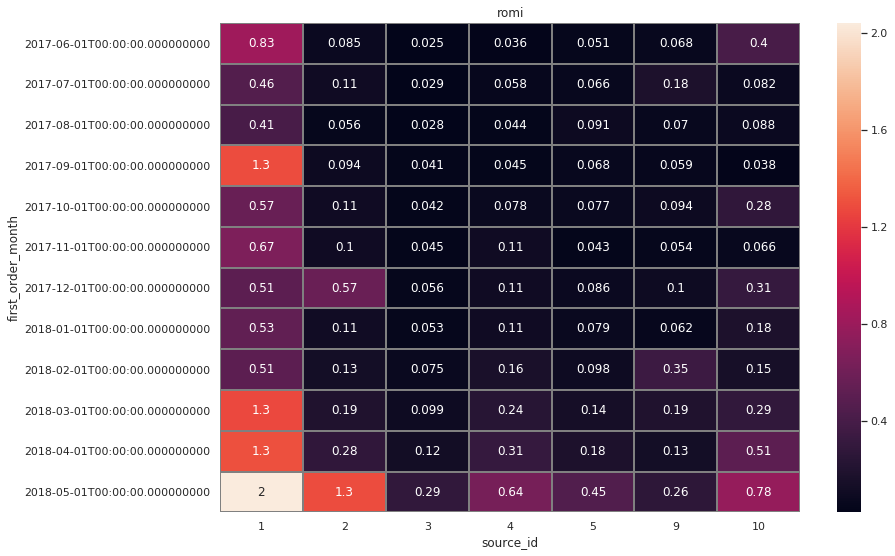

In [103]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('romi')
sns.heatmap(output_source, annot=True, linewidths=1, linecolor='gray');

In [104]:
output_source.cumsum(axis=0).mean(axis=0) 

source_id
1     4.680820
2     1.011212
3     0.304954
4     0.589644
5     0.524413
9     0.711360
10    1.308118
dtype: float64

## Вывод

Всего потратили на маркетинг 329131 у.е. Больше всего потратили на маркетинговый канал №3 - почти 140000 у.е., меньше всего на 9 и 10 - менее 10000 у.е. Самые низкие затраты на маркетинг были в августе - почти 15000 у.е., потом они начали расти и к декабрю были самые высокие значения почти 39000 у.е. С января затраты на маркетинг уменьшались.

# 7. Общий вывод

- В среднем в месяц сайт посещали 23228 человек. При этом в зимний период количество поситителей возрастает в 2 раза (почти 30000 человек) по сравнению с летним (13000 человек). Вероятно, это связано с тем, что летом люди хотят больше времени проводить на улице, а как только холодает, предпочитают ходить на концерты, в театр и т.д.

- В среднем одна сессия длится примерно 1 минуту. Коэффициент удержания Retention Rate пользователей очень низкий, на следующий месяц после первой покупки возвращается только 5-7% покупателей. Коэффициент удержания за 11 месяцев опустился на 3.1%, При этом в сентябре, ноябре были самые высокие показатели: 8.8% и 7.9%.

- Всего за период с июня 2017 по конец мая 2018 года потратили на маркетинг 329131 у.е. Половина всех затрат приходится на источник 3, вторая половина распределена на источники 1, 4, 5 и 6. Источники 9 и 10 почти не финансировались

- Наивысший показатель возврата инвестиций был у 1 маркетингового канала, 2 и 10 канал значительно меньше, но тоже показали хорошие результаты. Самые низкие показатели возврата инвестиций были у 3,4,5 и 9 маркетинговых каналов. Необходимо перераспределить бюджет по каналам, т.к. половина всех средств потрачена на источник 3, который  показывает очень низкие показатели возврата инвестиций.